In [208]:
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt

In [155]:
df = pd.read_excel("Full_Data_2_Processed.xlsx")

In [156]:
df

,Restaurant,Comments,Output_Final
0,1618 Asian Fusion,Christian was fabulous. We would highly recomm...,Ambiance - Great||Menu - Elevated||Price - Rea...
1,1618 Asian Fusion,As soon as we walked in it was very very warm ...,Food - Soup dumplings (delicate and flavorful)...
2,1618 Asian Fusion,Visited from Hawaii and was looking for a plac...,Food - Amazing||Music - Live performance||Serv...
3,1618 Asian Fusion,1618 Asian fusion had great service! Shout out...,"Food - Bao buns (delicious), General Tso chick..."
4,1618 Asian Fusion,Huge menu. Egg rolls for appetizer and Shrimp...,"Food - Egg rolls (nice fry), Shrimp Panang Cur..."
...,...,...,...
1034,Qi Austin,Qi is a new restaurant in downtown Austin. Gre...,"Food - Egg drop soup (great), Shrimp hargow (g..."
1035,Qi Austin,Very underwhelmed by the flavor and seasoning ...,"Food - Combination Fried Rice (underwhelming),..."
1036,Qi Austin,My sister and I had a fantastic brunch at Qi t...,"Food - Lobster Dumplings (best), Crab Meat Sou..."
1037,Qi Austin,We spent a lot of money here and it was well w...,"Food - Dumplings (loved), Soup dumplings (crav..."


In [157]:
df_2 = df[df['Output_Final'].str.contains(r'^\w+ -')]
df_2

,Restaurant,Comments,Output_Final
0,1618 Asian Fusion,Christian was fabulous. We would highly recomm...,Ambiance - Great||Menu - Elevated||Price - Rea...
1,1618 Asian Fusion,As soon as we walked in it was very very warm ...,Food - Soup dumplings (delicate and flavorful)...
2,1618 Asian Fusion,Visited from Hawaii and was looking for a plac...,Food - Amazing||Music - Live performance||Serv...
3,1618 Asian Fusion,1618 Asian fusion had great service! Shout out...,"Food - Bao buns (delicious), General Tso chick..."
4,1618 Asian Fusion,Huge menu. Egg rolls for appetizer and Shrimp...,"Food - Egg rolls (nice fry), Shrimp Panang Cur..."
...,...,...,...
1034,Qi Austin,Qi is a new restaurant in downtown Austin. Gre...,"Food - Egg drop soup (great), Shrimp hargow (g..."
1035,Qi Austin,Very underwhelmed by the flavor and seasoning ...,"Food - Combination Fried Rice (underwhelming),..."
1036,Qi Austin,My sister and I had a fantastic brunch at Qi t...,"Food - Lobster Dumplings (best), Crab Meat Sou..."
1037,Qi Austin,We spent a lot of money here and it was well w...,"Food - Dumplings (loved), Soup dumplings (crav..."


In [158]:
# Function to extract topics from the text
def extract_topics(text):
    topics = []
    parts = text.split("||")  # Split the text by "||"
    for part in parts:
        topic = part.split(" - ")[0]  # Extract the topic from each part
        topics.append(topic)
    return topics



In [159]:
# Apply the function to the text column and create a new column for topics
df_2['topics'] = df_2['Output_Final'].apply(extract_topics)

C:\Users\vgupt\AppData\Local\Temp\ipykernel_25636\2039339274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['topics'] = df_2['Output_Final'].apply(extract_topics)


In [160]:
df_2

,Restaurant,Comments,Output_Final,topics
0,1618 Asian Fusion,Christian was fabulous. We would highly recomm...,Ambiance - Great||Menu - Elevated||Price - Rea...,"[Ambiance, Menu, Price, Service]"
1,1618 Asian Fusion,As soon as we walked in it was very very warm ...,Food - Soup dumplings (delicate and flavorful)...,"[Food, Ambiance]"
2,1618 Asian Fusion,Visited from Hawaii and was looking for a plac...,Food - Amazing||Music - Live performance||Serv...,"[Food, Music, Service]"
3,1618 Asian Fusion,1618 Asian fusion had great service! Shout out...,"Food - Bao buns (delicious), General Tso chick...","[Food, Ambiance, Service]"
4,1618 Asian Fusion,Huge menu. Egg rolls for appetizer and Shrimp...,"Food - Egg rolls (nice fry), Shrimp Panang Cur...","[Food, Menu]"
...,...,...,...,...
1034,Qi Austin,Qi is a new restaurant in downtown Austin. Gre...,"Food - Egg drop soup (great), Shrimp hargow (g...","[Food, Ambiance, Service, Price]"
1035,Qi Austin,Very underwhelmed by the flavor and seasoning ...,"Food - Combination Fried Rice (underwhelming),...","[Food, Price, Service]"
1036,Qi Austin,My sister and I had a fantastic brunch at Qi t...,"Food - Lobster Dumplings (best), Crab Meat Sou...","[Food, Service, Ambiance]"
1037,Qi Austin,We spent a lot of money here and it was well w...,"Food - Dumplings (loved), Soup dumplings (crav...","[Food, Service, Ambiance]"


In [161]:
# Combine all the lists in the 'topics' column
all_topics = sum(df_2['topics'], [])

# Get unique topics
unique_topics = list(set(all_topics))

unique_topics

['',
 'Music',
 'Drinks -',
 'Location',
 'Service',
 'Ambiance -',
 'Price',
 'Vietnamese fried chicken (found nowhere)',
 'Ambiance',
 'Drinks',
 'Parking',
 'Food',
 'Menu']

In [162]:
filtered_topics = ['Menu',
 'Parking',
 'Price',
 'Food',
 'Ambiance',
 'Service',
 'Drinks',
 'Location',
 'Music']

In [163]:
df_3 = df_2[df_2['topics'].apply(lambda x: all(topic in filtered_topics for topic in x))]
df_3

,Restaurant,Comments,Output_Final,topics
0,1618 Asian Fusion,Christian was fabulous. We would highly recomm...,Ambiance - Great||Menu - Elevated||Price - Rea...,"[Ambiance, Menu, Price, Service]"
1,1618 Asian Fusion,As soon as we walked in it was very very warm ...,Food - Soup dumplings (delicate and flavorful)...,"[Food, Ambiance]"
2,1618 Asian Fusion,Visited from Hawaii and was looking for a plac...,Food - Amazing||Music - Live performance||Serv...,"[Food, Music, Service]"
3,1618 Asian Fusion,1618 Asian fusion had great service! Shout out...,"Food - Bao buns (delicious), General Tso chick...","[Food, Ambiance, Service]"
4,1618 Asian Fusion,Huge menu. Egg rolls for appetizer and Shrimp...,"Food - Egg rolls (nice fry), Shrimp Panang Cur...","[Food, Menu]"
...,...,...,...,...
1034,Qi Austin,Qi is a new restaurant in downtown Austin. Gre...,"Food - Egg drop soup (great), Shrimp hargow (g...","[Food, Ambiance, Service, Price]"
1035,Qi Austin,Very underwhelmed by the flavor and seasoning ...,"Food - Combination Fried Rice (underwhelming),...","[Food, Price, Service]"
1036,Qi Austin,My sister and I had a fantastic brunch at Qi t...,"Food - Lobster Dumplings (best), Crab Meat Sou...","[Food, Service, Ambiance]"
1037,Qi Austin,We spent a lot of money here and it was well w...,"Food - Dumplings (loved), Soup dumplings (crav...","[Food, Service, Ambiance]"


In [164]:
# Combine all the lists in the 'topics' column
all_topics_2 = sum(df_3['topics'], [])

# Get unique topics
unique_topics_2 = list(set(all_topics_2))

unique_topics_2

['Music',
 'Location',
 'Service',
 'Price',
 'Ambiance',
 'Drinks',
 'Parking',
 'Food',
 'Menu']

In [183]:
unique_topics_2 = [item.lower() for item in unique_topics_2]

In [196]:
unique_topics_2

['music',
 'location',
 'service',
 'price',
 'ambiance',
 'drinks',
 'parking',
 'food',
 'menu']

In [217]:
df_4 = df_3.copy()

# Create new columns for each topic
for topic in unique_topics_2:
    df_4[topic] = ''


In [218]:
# Convert the strings in the Output_Final column to lowercase
df_4['Output_Final'] = df_4['Output_Final'].str.lower()

In [219]:
# Assuming df is your DataFrame and 'Output_Final' is the column containing the text
df_4['Output_Final'] = df_4['Output_Final'].str.replace('soup dumpling ', 'soup dumplings ', regex=True)

In [220]:

# Iterate over each row
for index, row in df_4.iterrows():
    print(index)
    output = row['Output_Final']
    parts = output.split("||")
    for part in parts:
        topic, details = part.split(" - ")
        if topic == 'Food':
            food_items = [item.split("(")[0].strip() for item in details.split(",")]
            print(index)
            print(topic)
            print(food_items)
            df_4.at[index, topic] = food_items
        else:
            # Process other topics as before
            
            takeaways = details.split(", ")
            print(index)
            print(topic)
            print(takeaways)
            df_4.at[index, topic] = takeaways

0
0
ambiance
['great']
0
menu
['elevated']
0
price
['reasonable']
0
service
['fabulous']
1
1
food
['soup dumplings (delicate and flavorful)', 'duck skewers (favorite)', 'lamb chops (hard to eat in a bowl and chewy)', 'sesame chicken (tasty)']
1
ambiance
['very warm']
2
2
food
['amazing']
2
music
['live performance']
2
service
['amazing', 'attentive with a positive attitude']
3
3
food
['bao buns (delicious)', 'general tso chicken (fresh and flavorful)']
3
ambiance
['casual but lovely relaxing atmosphere']
3
service
['great', 'best service at the bar top', 'super sweet and fast']
4
4
food
['egg rolls (nice fry)', 'shrimp panang curry (started great but got sweeter', 'needed some acid to balance sweetness)', 'vegetable curry (started great but got sweeter', 'needed some acid to balance sweetness)']
4
menu
['huge']
5
5
food
['dragon fruit refresher (absolutely delicious)', 'pork bun (enjoyed)', 'satays (enjoyed)', 'fresh spring roll (recommended but sticks to banana leaves if not eaten fir

401
401
food
['pad thai (mediocre)', 'molten lava cake (not as advertised)']
401
service
['nice']
401
ambiance
['great ']
402
402
food
['4/5']
402
ambiance
['2/5']
402
service
['3/5']
402
price
['5/5']
404
404
food
['thai tum yum coconut fried rice (great flavor', 'disappointing because it was covered in cilantro', "which wasn't listed on the menu)"]
404
service
['good']
404
ambiance
['great']
404
menu
['huge ']
405
405
food
['chicken dumplings (great)', 'shrimp pecan (good)', 'pork soup dumplings (good)', 'sesame balls (nice)', 'salt and pepper tofu (good)', 'vegetarian soup dumplings (good)']
405
service
['great']
405
ambiance
['nice ']
406
406
food
['peking duck (crispy and unexpectedly non-greasy)', 'soup dumplings (must-have)', 'green thai iced tea (recommended)', 'egg coffee (delicious)']
406
ambiance
['immaculate', 'live music']
406
service
['friendly and attentive ']
407
407
food
['soup dumplings (phenomenal)', 'dim sum (phenomenal)']
407
ambiance
['beautiful décor']
408
408
fo

ambiance
['beautiful']
872
service
['good ']
873
873
food
['very good']
873
ambiance
['lovely decorations']
873
service
['helpful', 'friendly\n']
874
874
food
['snow pea shoots (recommended)', 'tofu (recommended)', 'soup dumplings (divine', 'recommended)', 'portions small']
874
ambiance
['chic']
874
service
['friendly and attentive']
874
price
['high ']
875
875
food
['dumplings (delicious)']
875
service
['good']
875
ambiance
['nice ']
876
876
food
['lobster and shanghai soup dumplings (delicious)', 'other dumplings (die for)', 'other entrees (eating off of each others plates', 'wanted more)']
876
price
['high']
876
service
['fast and kind']
876
ambiance
['beautiful ']
877
877
food
['dim sum (fantastic)', 'truffle fried rice (packed with flavor)', 'green tea creme so ']
878
878
food
['dim sum (excellent)', 'steam lobster dumplings (exceptional)', "peking duck (one of the best he'd ever had)", 'sesame chicken (very good)', "honey akaushi beef (one of the best he'd ever had)"]
878
ambianc

In [221]:
df_4[df_4['Output_Final'].str.contains(r'(?<=\s)\b\w+\s*-\s', regex=True)]

,Restaurant,Comments,Output_Final,topics,music,location,service,price,ambiance,drinks,parking,food,menu


In [188]:
def extract_food_dict(row):
    food_dict = {}
    food_details = re.findall(r'(\w+\s\w+)\s\((.*?)\)', row['Output_Final'])
    for food, takeaway in food_details:
        food_dict[food.strip()] = [t.strip() for t in takeaway.split(',')]
    return food_dict

In [222]:
# Apply the function to create the new column
df_4['food_dict'] = df_4.apply(extract_food_dict, axis=1)

In [190]:
df_4

,Restaurant,Comments,Output_Final,topics,music,location,service,price,ambiance,drinks,parking,food,menu,food_dict
0,1618 Asian Fusion,Christian was fabulous. We would highly recomm...,ambiance - great||menu - elevated||price - rea...,"[Ambiance, Menu, Price, Service]",,,[fabulous],[reasonable],[great],,,,[elevated],{}
1,1618 Asian Fusion,As soon as we walked in it was very very warm ...,food - soup dumplings (delicate and flavorful)...,"[Food, Ambiance]",,,,,[very warm],,,"[soup dumplings (delicate and flavorful), duck...",,"{'soup dumplings': ['delicate and flavorful'],..."
2,1618 Asian Fusion,Visited from Hawaii and was looking for a plac...,food - amazing||music - live performance||serv...,"[Food, Music, Service]",[live performance],,"[amazing, attentive with a positive attitude]",,,,,[amazing],,{}
3,1618 Asian Fusion,1618 Asian fusion had great service! Shout out...,"food - bao buns (delicious), general tso chick...","[Food, Ambiance, Service]",,,"[great, best service at the bar top, super swe...",,[casual but lovely relaxing atmosphere],,,"[bao buns (delicious), general tso chicken (fr...",,"{'bao buns': ['delicious'], 'tso chicken': ['f..."
4,1618 Asian Fusion,Huge menu. Egg rolls for appetizer and Shrimp...,"food - egg rolls (nice fry), shrimp panang cur...","[Food, Menu]",,,,,,,,"[egg rolls (nice fry), shrimp panang curry (st...",[huge],"{'egg rolls': ['nice fry'], 'panang curry': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Qi Austin,Qi is a new restaurant in downtown Austin. Gre...,"food - egg drop soup (great), shrimp hargow (g...","[Food, Ambiance, Service, Price]",,,[excellent],[high ],[nice],,,"[egg drop soup (great), shrimp hargow (great),...",,"{'drop soup': ['great'], 'shrimp hargow': ['gr..."
1035,Qi Austin,Very underwhelmed by the flavor and seasoning ...,"food - combination fried rice (underwhelming),...","[Food, Price, Service]",,,[bad ],[high],,,,"[combination fried rice (underwhelming), pork ...",,"{'fried rice': ['underwhelming'], 'pork belly'..."
1036,Qi Austin,My sister and I had a fantastic brunch at Qi t...,"food - lobster dumplings (best), crab meat sou...","[Food, Service, Ambiance]",,,[great],,[nice ],,,"[lobster dumplings (best), crab meat soup dump...",,"{'lobster dumplings': ['best'], 'soup dumpling..."
1037,Qi Austin,We spent a lot of money here and it was well w...,"food - dumplings (loved), soup dumplings (crav...","[Food, Service, Ambiance]",,,[great],,[great ],,,"[dumplings (loved), soup dumplings (craving)]",,{'soup dumplings': ['craving']}


In [255]:
# Replace 'high ' with 'high' in the 'price' column
df_4['price'] = df_4['price'].apply(lambda x: [item.replace('high ', 'high') for item in x])

In [256]:
# Replace 'high ' with 'high' in the 'price' column
df_4['price'] = df_4['price'].apply(lambda x: [item.replace('reasonable ', 'reasonable') for item in x])

In [257]:
# Replace 'high ' with 'high' in the 'price' column
df_4['price'] = df_4['price'].apply(lambda x: [item.replace('high\n', 'high') for item in x])

In [258]:
# Replace 'high ' with 'high' in the 'price' column
df_4['price'] = df_4['price'].apply(lambda x: [item.replace('slightly high ', 'slightly high') for item in x])

In [259]:
# Replace 'high ' with 'high' in the 'price' column
df_4['price'] = df_4['price'].apply(lambda x: [item.replace('bit high', 'slightly high') for item in x])

In [260]:
# Replace 'high ' with 'high' in the 'price' column
df_4['price'] = df_4['price'].apply(lambda x: [item.replace('a little pricey ', 'tad pricey') for item in x])

In [261]:
df_5=df_4[['Restaurant','music',
 'location',
 'service',
 'price',
 'ambiance',
 'drinks',
 'parking',
 'food',
 'menu']]
df_5

,Restaurant,music,location,service,price,ambiance,drinks,parking,food,menu
0,1618 Asian Fusion,,,[fabulous],[reasonable],[great],,,,[elevated]
1,1618 Asian Fusion,,,,[],[very warm],,,"[soup dumplings (delicate and flavorful), duck...",
2,1618 Asian Fusion,[live performance],,"[amazing, attentive with a positive attitude]",[],,,,[amazing],
3,1618 Asian Fusion,,,"[great, best service at the bar top, super swe...",[],[casual but lovely relaxing atmosphere],,,"[bao buns (delicious), general tso chicken (fr...",
4,1618 Asian Fusion,,,,[],,,,"[egg rolls (nice fry), shrimp panang curry (st...",[huge]
...,...,...,...,...,...,...,...,...,...,...
1034,Qi Austin,,,[excellent],[high],[nice],,,"[egg drop soup (great), shrimp hargow (great),...",
1035,Qi Austin,,,[bad ],[high],,,,"[combination fried rice (underwhelming), pork ...",
1036,Qi Austin,,,[great],[],[nice ],,,"[lobster dumplings (best), crab meat soup dump...",
1037,Qi Austin,,,[great],[],[great ],,,"[dumplings (loved), soup dumplings (craving)]",


In [266]:
# Initialize an empty dictionary to store counts
counts = {}

# Iterate over each restaurant
for restaurant in df_5['Restaurant']:
    counts[restaurant] = {}
    
    # Iterate over each topic
    for topic in df_5.columns[1:]:
        texts = df_5.loc[df_5['Restaurant'] == restaurant, topic].explode().dropna()
        unique_texts, text_counts = texts.value_counts().index.tolist(), texts.value_counts().tolist()
        counts[restaurant][topic] = dict(zip(unique_texts, text_counts))

# Initialize an empty list to store DataFrame rows
rows = []

# Iterate over each restaurant
for restaurant, topics in counts.items():
    # Initialize an empty dictionary to store row data for the current restaurant
    row_data = {'Restaurant': restaurant}
    
    # Iterate over each topic for the current restaurant
    for topic, takeaways in topics.items():
        # Convert the dictionary of takeaways into a string representation
        #takeaway_str = str(takeaways)
        # Add the takeaway string to the row data dictionary
        row_data[topic] = takeaways
    
    # Append the row data to the list of rows
    rows.append(row_data)

# Create a DataFrame from the list of rows
df_6 = pd.DataFrame(rows)

df_6

,Restaurant,music,location,service,price,ambiance,drinks,parking,food,menu
0,1618 Asian Fusion,"{'': 478, 'live music': 11, 'live': 3, 'loud':...","{'': 465, 'great': 4, 'austin': 3, 'hard to fi...","{'': 68, 'great': 55, 'friendly and attentive ...","{'high': 32, 'reasonable': 11, 'amazing ': 1, ...","{'': 171, 'great': 37, 'nice ': 31, 'nice': 27...","{'': 427, 'delicious': 4, 'good': 3, '10/10': ...","{'': 470, 'free': 7, 'easy': 7, 'available': 5...","{'needed some acid to balance sweetness)': 26,...","{'': 462, 'huge ': 24, 'huge': 4, 'elevated': ..."
1,Qi Austin,"{'': 471, 'loud ': 2, 'chinese music ': 1}","{'': 422, 'great': 5, 'austin': 3, 'great ': 2...","{'': 92, 'great': 47, 'friendly and attentive ...","{'high': 72, 'slightly high': 4, 'reasonable':...","{'': 156, 'nice ': 36, 'great': 25, 'nice': 25...","{'': 422, 'delicious cocktails': 2, 'delicious...","{'': 429, 'free': 16, 'easy': 7, 'available': ...","{'needed some acid to balance sweetness)': 24,...","{'': 437, 'huge ': 17, 'huge': 3, 'pan fried b..."


In [225]:
df_7 = df_4[['Restaurant', 'food_dict']]
df_7

,Restaurant,food_dict
0,1618 Asian Fusion,{}
1,1618 Asian Fusion,"{'soup dumplings': ['delicate and flavorful'],..."
2,1618 Asian Fusion,{}
3,1618 Asian Fusion,"{'bao buns': ['delicious'], 'tso chicken': ['f..."
4,1618 Asian Fusion,"{'egg rolls': ['nice fry'], 'panang curry': ['..."
...,...,...
1034,Qi Austin,"{'drop soup': ['great'], 'shrimp hargow': ['gr..."
1035,Qi Austin,"{'fried rice': ['underwhelming'], 'pork belly'..."
1036,Qi Austin,"{'lobster dumplings': ['best'], 'soup dumpling..."
1037,Qi Austin,{'soup dumplings': ['craving']}


In [226]:
# Initialize a defaultdict to aggregate takeaways
aggregated_data = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# Iterate over each row in df_7
for _, row in df_7.iterrows():
    restaurant = row['Restaurant']
    food_dict = row['food_dict']
    
    # Iterate over each food item and its list of takeaways
    for food_item, takeaways_list in food_dict.items():
        # Update the aggregated data with the counts of takeaways
        for takeaway in takeaways_list:
            aggregated_data[restaurant][food_item][takeaway] += 1

# Create a list of dictionaries for each restaurant
rows = []
for restaurant, food_items in aggregated_data.items():
    row_data = {'Restaurant': restaurant}
    for food_item, takeaways_counts in food_items.items():
        row_data[food_item] = takeaways_counts
    rows.append(row_data)

# Create the DataFrame df_8
df_8 = pd.DataFrame(rows)
df_8


,Restaurant,soup dumplings,duck skewers,lamb chops,sesame chicken,bao buns,tso chicken,egg rolls,panang curry,vegetable curry,...,lavender gin,lychee tini,bun dessert,lemonade cocktail,pineapple buns,flower drink,bbq bun,chow fun,style vegetable,egg tart
0,1618 Asian Fusion,"{'delicate and flavorful': 1, 'good': 7, 'reco...","{'favorite': 4, 'good': 2, 'delicious': 2, 'am...","{'hard to eat in a bowl and chewy': 1, 'good':...","{'tasty': 1, 'good': 4, 'crunchy': 1, 'sweet':...","{'delicious': 1, 'good': 1}","{'fresh and flavorful': 1, 'could be spicier':...","{'nice fry': 1, 'favorites': 1, 'stellar': 1, ...","{'started great but got sweeter': 4, 'needed s...","{'started great but got sweeter': 6, 'needed s...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Qi Austin,"{'unique': 1, 'outstanding': 2, 'must': 1, 'go...","{'great': 1, 'tasty': 1, 'good': 1}",NaN,"{'phenomenal': 1, 'favorite': 1, 'crispy': 1, ...","{'excellent': 1, 'good': 1, 'not good': 1}","{'good but bland': 1, 'great': 1, 'good': 1}","{'loved': 1, 'mostly wrapper flavored': 1, 'fa...","{'started great but got sweeter': 2, 'needed s...","{'started great but got sweeter': 2, 'needed s...",...,{'beautiful and tasty': 1},{'refreshing': 1},{'can't stop thinking': 1},{'incredible': 1},{'amazing': 1},{'fun': 1},{'juicy': 1},"{'very different': 1, 'piled high with a varie...","{'wilted lettuce': 1, 'seasoned well': 1}",{'best': 1}


In [272]:
df_8.iloc[:,:10]

,Restaurant,soup dumplings,duck skewers,lamb chops,sesame chicken,bao buns,tso chicken,egg rolls,panang curry,vegetable curry
0,1618 Asian Fusion,"{'delicate and flavorful': 1, 'good': 7, 'reco...","{'favorite': 4, 'good': 2, 'delicious': 2, 'am...","{'hard to eat in a bowl and chewy': 1, 'good':...","{'tasty': 1, 'good': 4, 'crunchy': 1, 'sweet':...","{'delicious': 1, 'good': 1}","{'fresh and flavorful': 1, 'could be spicier':...","{'nice fry': 1, 'favorites': 1, 'stellar': 1, ...","{'started great but got sweeter': 4, 'needed s...","{'started great but got sweeter': 6, 'needed s..."
1,Qi Austin,"{'unique': 1, 'outstanding': 2, 'must': 1, 'go...","{'great': 1, 'tasty': 1, 'good': 1}",NaN,"{'phenomenal': 1, 'favorite': 1, 'crispy': 1, ...","{'excellent': 1, 'good': 1, 'not good': 1}","{'good but bland': 1, 'great': 1, 'good': 1}","{'loved': 1, 'mostly wrapper flavored': 1, 'fa...","{'started great but got sweeter': 2, 'needed s...","{'started great but got sweeter': 2, 'needed s..."


In [227]:
df_9 = df_4[df_4['food_dict']=={}][['Restaurant', 'food']]
df_9

,Restaurant,food
0,1618 Asian Fusion,
2,1618 Asian Fusion,[amazing]
8,1618 Asian Fusion,"[flavorful, expressive and traditional]"
9,1618 Asian Fusion,[great]
15,1618 Asian Fusion,[wonderful]
...,...,...
1023,Qi Austin,[good]
1025,Qi Austin,[tasty]
1030,Qi Austin,[2/5]
1032,Qi Austin,[dim sum fusion]


In [229]:
# Initialize an empty dictionary to store counts
counts = {}

# Iterate over each restaurant
for restaurant in df_9['Restaurant']:
    counts[restaurant] = {}
    
    # Iterate over each topic
    for topic in df_9.columns[1:]:
        texts = df_9.loc[df_9['Restaurant'] == restaurant, topic].explode().dropna()
        unique_texts, text_counts = texts.value_counts().index.tolist(), texts.value_counts().tolist()
        counts[restaurant][topic] = dict(zip(unique_texts, text_counts))

# Initialize an empty list to store DataFrame rows
rows = []

# Iterate over each restaurant
for restaurant, topics in counts.items():
    # Initialize an empty dictionary to store row data for the current restaurant
    row_data = {'Restaurant': restaurant}
    
    # Iterate over each topic for the current restaurant
    for topic, takeaways in topics.items():
        # Convert the dictionary of takeaways into a string representation
        takeaway_str = str(takeaways)
        # Add the takeaway string to the row data dictionary
        row_data[topic] = takeaway_str
    
    # Append the row data to the list of rows
    rows.append(row_data)

# Create a DataFrame from the list of rows
df_10 = pd.DataFrame(rows)

df_10

,Restaurant,food
0,1618 Asian Fusion,"{'delicious': 16, '': 15, 'amazing': 14, 'grea..."
1,Qi Austin,"{'great': 13, 'delicious': 6, '10/10': 5, '': ..."


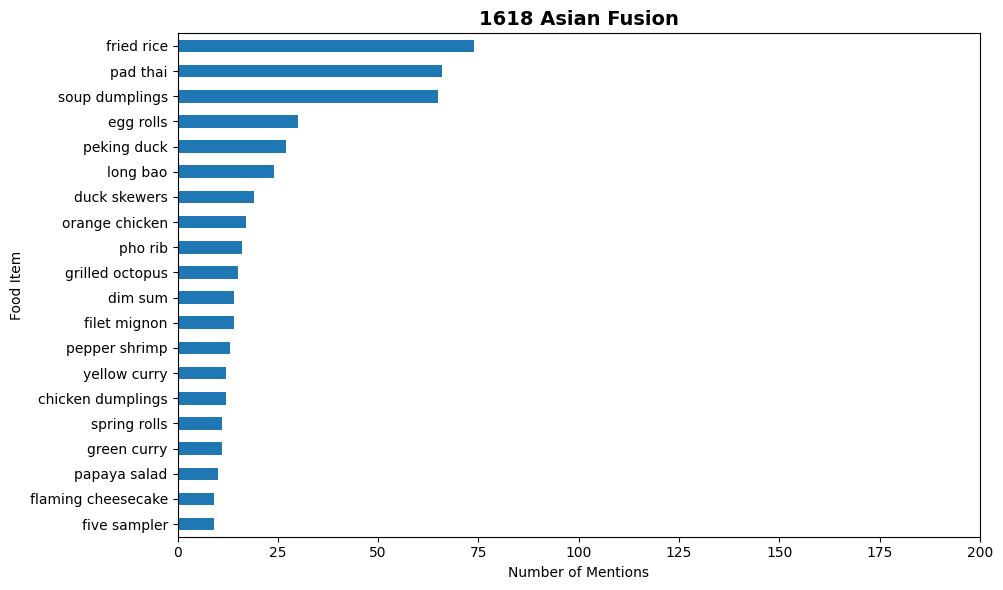

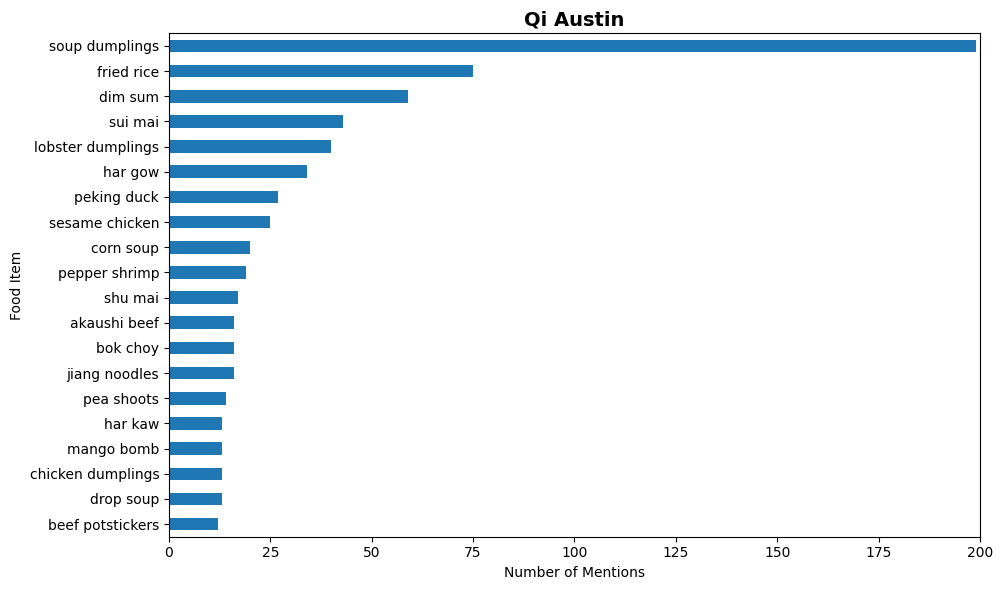

In [233]:
# Initialize a dictionary to store counts
food_counts = {}

# Iterate over each row in the DataFrame
for index, row in df_4.iterrows():
    restaurant = row['Restaurant']
    food_dict = row['food_dict']
    
    # Initialize counts dictionary for the restaurant if not already present
    if restaurant not in food_counts:
        food_counts[restaurant] = {}
    
    # Iterate over food items in the food_dict
    for food_item, takeaways in food_dict.items():
        # Update counts dictionary
        if food_item not in food_counts[restaurant]:
            food_counts[restaurant][food_item] = 0
        food_counts[restaurant][food_item] += 1

# Plot horizontal bar plots for each restaurant separately
for restaurant, counts in food_counts.items():
    # Create a DataFrame from the counts dictionary for the current restaurant
    df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])
    
    # Sort the food items based on counts and select top 20
    top_20_food_items = df_counts.sort_values(by='Count', ascending=True).tail(20)
    
    # Reverse the order of the DataFrame
    top_20_food_items = top_20_food_items.iloc[::-1]
    
    # Plot horizontal bar plot for top 20 food items
    ax = top_20_food_items.plot(kind='barh', figsize=(10, 6), legend=False)
    plt.title(restaurant, fontweight='bold', fontsize=14)
    plt.xlabel('Number of Mentions')
    plt.ylabel('Food Item')
    plt.tight_layout()
    plt.gca().invert_yaxis()
    ax.set_xlim([0, 200])  # Set x-axis limit to the maximum count
    plt.show()

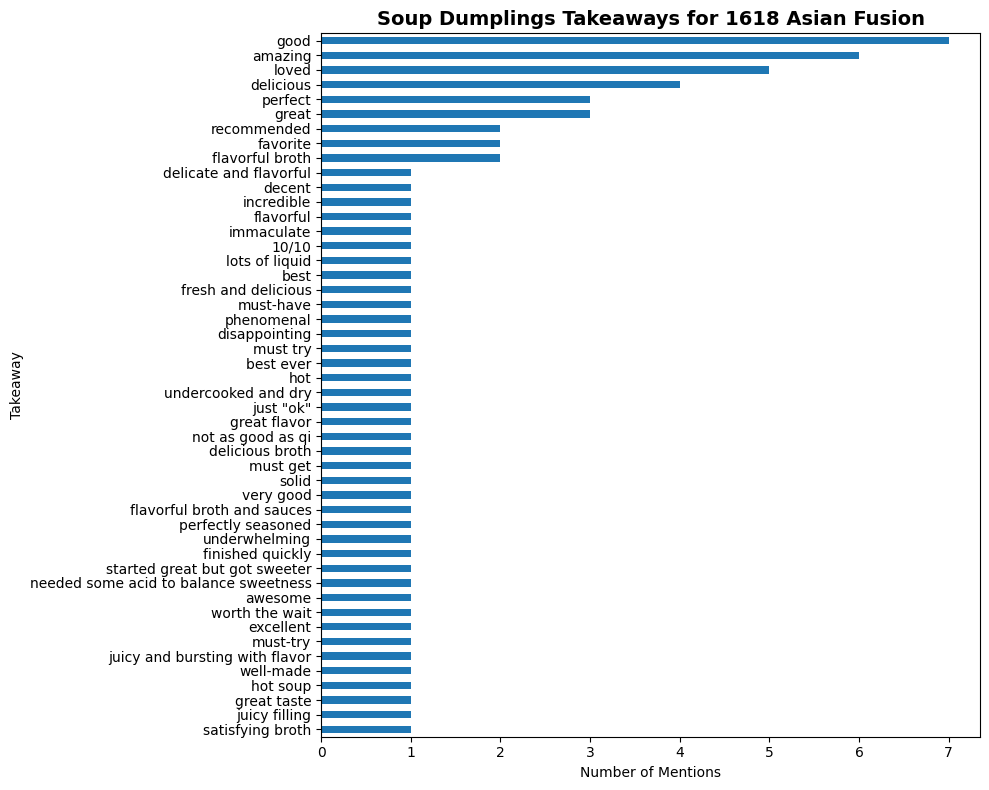

In [240]:
# Filter the DataFrame for the "1618 Asian Fusion" restaurant
restaurant_df = df_8[df_8['Restaurant'] == '1618 Asian Fusion']

# Get the soup dumplings data for the restaurant
soup_dumplings_data = restaurant_df['soup dumplings'].iloc[0]

# Convert the dictionary into a DataFrame
df_takeaways = pd.DataFrame.from_dict(soup_dumplings_data, orient='index', columns=['Count'])

# Sort the DataFrame based on counts and select top takeaways
top_takeaways = df_takeaways.sort_values(by='Count', ascending=False)#.head(10)

# Plot horizontal bar plot for top takeaways
ax = top_takeaways.plot(kind='barh', figsize=(10, 8), legend=False)
plt.title('Soup Dumplings Takeaways for 1618 Asian Fusion', fontweight='bold', fontsize=14)
plt.xlabel('Number of Mentions')
plt.ylabel('Takeaway')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency item at the top
plt.tight_layout()
plt.show()

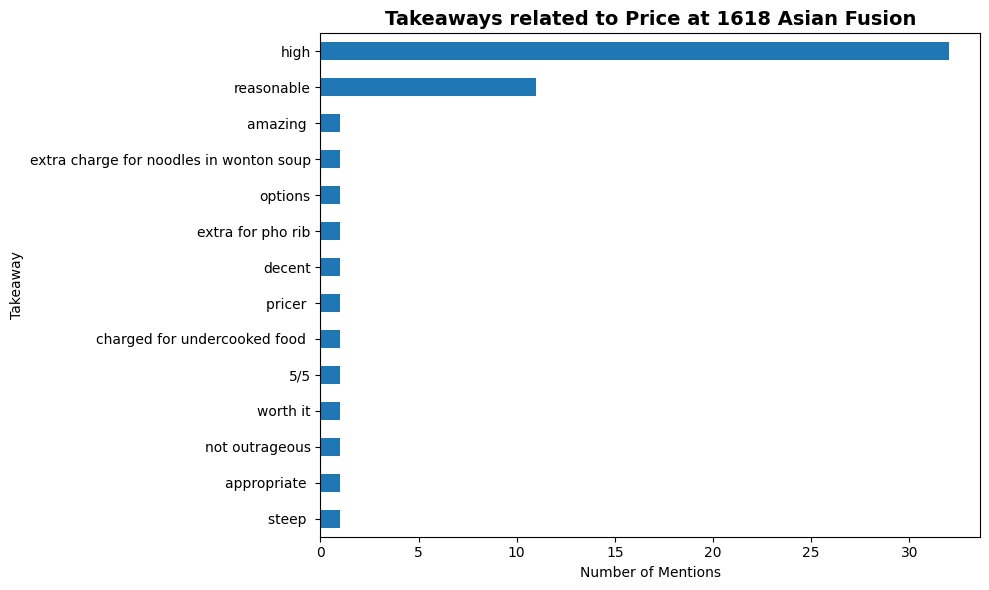

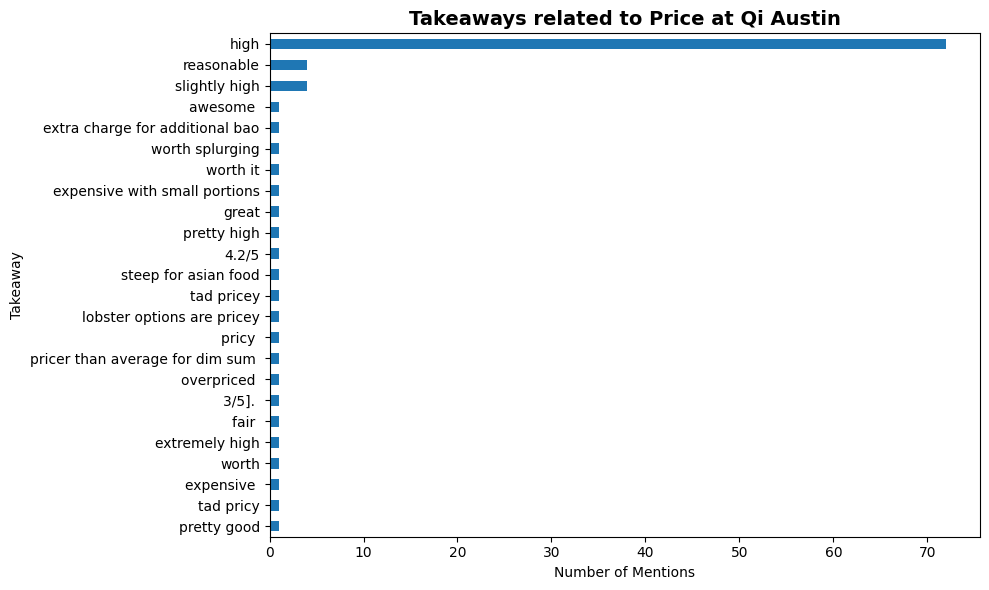

In [269]:
# Initialize a dictionary to store plots for each restaurant
plots = {}

# Iterate over each row in the DataFrame
for index, row in df_6.iterrows():
    restaurant = row['Restaurant']
    price_dict = row['price']
    
    # Convert the modified dictionary into a DataFrame
    df_takeaways = pd.DataFrame.from_dict(price_dict, orient='index', columns=['Count'])
    # Sort the DataFrame based on counts
    df_takeaways = df_takeaways.sort_values(by='Count', ascending=False)
    # Plot horizontal bar plot for takeaways
    ax = df_takeaways.plot(kind='barh', figsize=(10, 6), legend=False)
    plt.title(f'Takeaways related to Price at {restaurant}', fontweight='bold', fontsize=14)
    plt.xlabel('Number of Mentions')
    plt.ylabel('Takeaway')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency item at the top
    plt.tight_layout()
    plots[restaurant] = ax

# Show the plots
plt.show()


In [267]:
df_takeaways

,Count
slightly high,4
reasonable,4
awesome,1
extra charge for additional bao,1
worth splurging,1
worth it,1
expensive with small portions,1
great,1
pretty high,1
4.2/5,1
